In [1]:
import numpy as np
import itk
import tqdm
import torch

from monai.transforms import CropForeground

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


In [2]:
# Brain
for split in ["train"]:
    with open(f"/playpen-raid2/lin.tian/projects/icon_lung/ICON/training_scripts/brain_t1_pipeline/splits/{split}.txt") as f:
        image_paths = f.readlines()

# cropper = CropForeground(lambda x: x>1)
# img_shapes = []
# for name in tqdm.tqdm(list(iter(image_paths))[:]):
#     name = name.split(".nii.gz")[0] + "_restore_brain.nii.gz"

#     image = torch.tensor(np.asarray(itk.imread(name)))[None]
#     croped_image = cropper(image)
#     img_shapes.append(list(croped_image.shape))


In [4]:
name.split('/')

['',
 'playpen-raid2',
 'Data',
 'HCP',
 'HCP_1200',
 '209329',
 'T1w',
 'T1w_acpc_dc_restore_brain.nii.gz']

In [7]:
import subprocess
import os
dest = "/playpen-ssd/lin.tian/data_local/HCP"
for name in tqdm.tqdm(list(iter(image_paths))[:]):
    name = name.split(".nii.gz")[0] + "_restore_brain.nii.gz"
    parent = '/'.join(name.split('/')[4:-1])
    # print(parent)
    # subprocess.run(f'mkdir -p {dest}/{parent}')
    os.makedirs(f"{dest}/{parent}", exist_ok=True)
    subprocess.run(f"cp -r {name} {dest}/{parent}", shell=True)

100%|██████████| 1073/1073 [03:42<00:00,  4.82it/s]


In [10]:
img_shapes = np.array(img_shapes)

In [12]:
print(np.max(img_shapes,0))
print(np.min(img_shapes,0))

[  1 219 286 219]
[  1 170 219 171]


In [8]:
# Knee
with open("/playpen-raid2/lin.tian/projects/icon_lung/ICON/training_scripts/oai_paper_pipeline/splits/train/pair_path_list.txt") as f:
    train_pair_paths = f.readlines()

knee_image_paths_set = set()
knee_image_paths = []
for p in train_pair_paths:
    p_s = p.split()
    if p_s[0] not in knee_image_paths_set:
        knee_image_paths.append([p_s[0], p_s[2]])
        knee_image_paths_set.add(p_s[0])
    if p_s[1] not in knee_image_paths_set:
        knee_image_paths.append([p_s[1], p_s[3]])
        knee_image_paths_set.add(p_s[1])

# cropper = CropForeground(lambda x: x>0)
# knee_img_shapes = []
# for name in tqdm.tqdm(list(iter(knee_image_paths))[:]):
#     img_path, seg_path = name[0].replace("playpen", "playpen-raid"), name[1].replace("playpen", "playpen-raid")
#     seg = torch.tensor(np.asarray(itk.imread(seg_path)))[None]
#     if "RIGHT" in img_path:
#         seg = torch.flip(seg, [1])
#     elif "LEFT" in img_path:
#         pass
#     else:
#         raise AssertionError()
#     croped_image = cropper(seg)
#     knee_img_shapes.append(list(croped_image.shape))

In [10]:
dest = "/playpen-ssd/lin.tian/data_local/OAI_segmentation"
for name in tqdm.tqdm(list(iter(knee_image_paths))[:]):
    img_path, seg_path = name[0].replace("playpen", "playpen-raid"), name[1].replace("playpen", "playpen-raid")
    img_parent = '/'.join(img_path.split('/')[5:-1])
    seg_parent = '/'.join(seg_path.split('/')[5:-1])
    # print(parent)
    # subprocess.run(f'mkdir -p {dest}/{parent}')
    os.makedirs(f"{dest}/{img_parent}", exist_ok=True)
    os.makedirs(f"{dest}/{seg_parent}", exist_ok=True)
    subprocess.run(f"cp -r {img_path} {dest}/{img_parent}", shell=True)
    subprocess.run(f"cp -r {seg_path} {dest}/{seg_parent}", shell=True)

100%|██████████| 2532/2532 [22:22<00:00,  1.89it/s]


In [39]:
knee_img_shapes_np = np.array(knee_img_shapes)
print(np.max(knee_img_shapes_np,0))
print(np.min(knee_img_shapes_np,0))

[  1 141 307 302]
[  1  91 102 150]


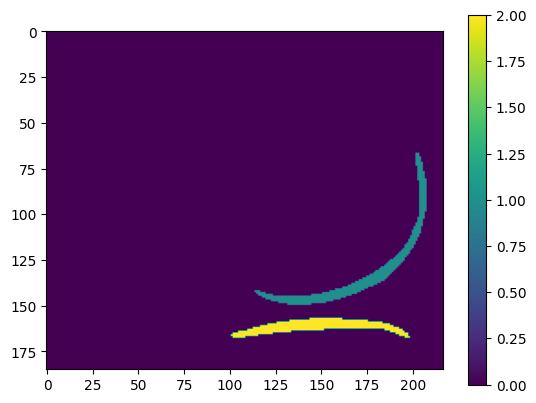

In [37]:
import matplotlib.pyplot as plt
plt.imshow(cropped_seg[0,10])
plt.colorbar()